In [43]:
# Step 1: Install Required Libraries the BigQuery library and faker:
!pip install --quiet google-cloud-bigquery faker


In [44]:
#Step 2: Authenticate Google Account
from google.colab import auth
auth.authenticate_user()


In [45]:
#Step 3: Initialize BigQuery Client and Set Project Info Insert Fake Data
from google.cloud import bigquery
import random
from faker import Faker
from datetime import datetime

# Initialize Faker for generating fake data
fake = Faker()

# Your actual Google Cloud Project ID (all lowercase, no spaces)
project_id = "realtimeecommerceanalytics"  # Replace this if your project ID is different

# Initialize BigQuery client with the project ID
client = bigquery.Client(project=project_id)

# Confirm project ID detected by the client
print("Using project:", client.project)


Using project: realtimeecommerceanalytics


In [46]:
# Step 4:Create Table with Schema
schema = [
    bigquery.SchemaField("order_id", "STRING", mode="REQUIRED"),
    bigquery.SchemaField("timestamp", "TIMESTAMP", mode="REQUIRED"),
    bigquery.SchemaField("product_id", "STRING", mode="REQUIRED"),
    bigquery.SchemaField("category", "STRING", mode="NULLABLE"),
    bigquery.SchemaField("price", "FLOAT", mode="REQUIRED"),
    bigquery.SchemaField("quantity", "INTEGER", mode="REQUIRED"),
    bigquery.SchemaField("location", "STRING", mode="NULLABLE"),
    bigquery.SchemaField("stock_remaining", "INTEGER", mode="NULLABLE"),
]

table = bigquery.Table(table_id, schema=schema)
try:
    table = client.create_table(table, exists_ok=True)
    print(f"Table '{table.table_id}' created or already exists.")
except Exception as e:
    print("Error creating table:", e)


Table 'orders' created or already exists.


In [47]:
# Step5: Generate fake data
def generate_fake_order():
    categories = ['Electronics', 'Fitness', 'Clothing', 'Home']
    return {
        "order_id": fake.uuid4(),
        "timestamp": datetime.utcnow().isoformat(),
        "product_id": str(random.randint(1000, 9999)),
        "category": random.choice(categories),
        "price": round(random.uniform(10.0, 500.0), 2),
        "quantity": random.randint(1, 5),
        "location": fake.city(),
        "stock_remaining": random.randint(0, 50)
    }


In [48]:
#Step 6: Insert Data into BigQuery (Standard Tier Only)
def insert_order_batch(order):
    job = client.load_table_from_json([order], table_id)
    job.result()
    print("Inserted 1 order via batch.")


In [49]:
#Insert Many Orders with a Loop
for _ in range(30):
    order = generate_fake_order()
    insert_order_batch(order)


Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.
Inserted 1 order via batch.


In [50]:
query = f"""
SELECT
  category,
  COUNT(order_id) AS total_orders,
  ROUND(SUM(price * quantity), 2) AS total_revenue
FROM `{table_id}`
GROUP BY category
ORDER BY total_revenue DESC
"""

query_job = client.query(query)
results = query_job.result().to_dataframe()

results.head()


,category,total_orders,total_revenue
0,Home,22,17179.54
1,Electronics,21,15454.56
2,Fitness,20,11571.28
3,Clothing,19,10124.06


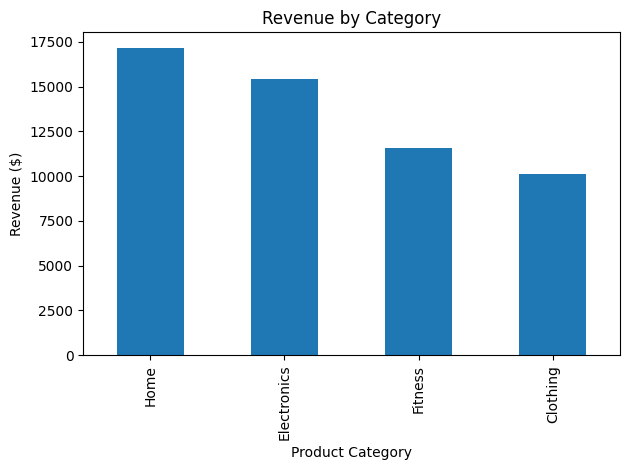

In [51]:
#sample
import matplotlib.pyplot as plt

results.plot(kind="bar", x="category", y="total_revenue", legend=False)
plt.title("Revenue by Category")
plt.ylabel("Revenue ($)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()
